In [1]:
#Created By - Vinay Pandey
#GitHub - https://github.com/vinay-biz

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
os.chdir(r"C:\Users\vinay\Desktop\MiniProj")

In [4]:
#Let's Load the Dataset

In [5]:
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('Real.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake["subject"]#.value_counts()

0               News
1               News
2               News
3               News
4               News
            ...     
23476    Middle-east
23477    Middle-east
23478    Middle-east
23479    Middle-east
23480    Middle-east
Name: subject, Length: 23481, dtype: object

In [10]:
real["subject"]#.value_counts()

0        politicsNews
1        politicsNews
2        politicsNews
3        politicsNews
4        politicsNews
             ...     
21412       worldnews
21413       worldnews
21414       worldnews
21415       worldnews
21416       worldnews
Name: subject, Length: 21417, dtype: object

In [11]:
#Creating a category for whether fake or not
#where 1 stand for fake news and 0 stands for real news

fake["category"]=1
real["category"]=0

In [12]:
#joining the data the two data frame and reseting index
df=pd.concat([fake,real]).reset_index(drop=True)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

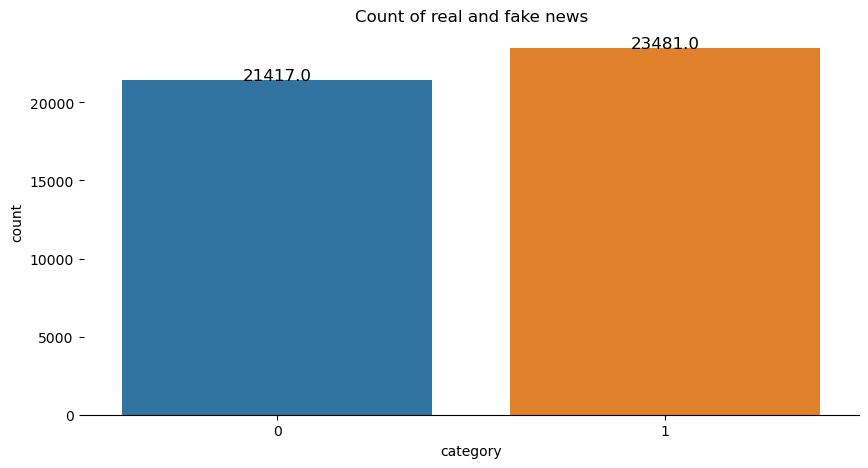

In [14]:
#Let's create a count plot for column category
fig = plt.figure(figsize=(10,5))
    
graph = sns.countplot(x='category', data=df)
plt.title("Count of real and fake news")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

In [15]:
#1 - Fake News
#0 - Real News

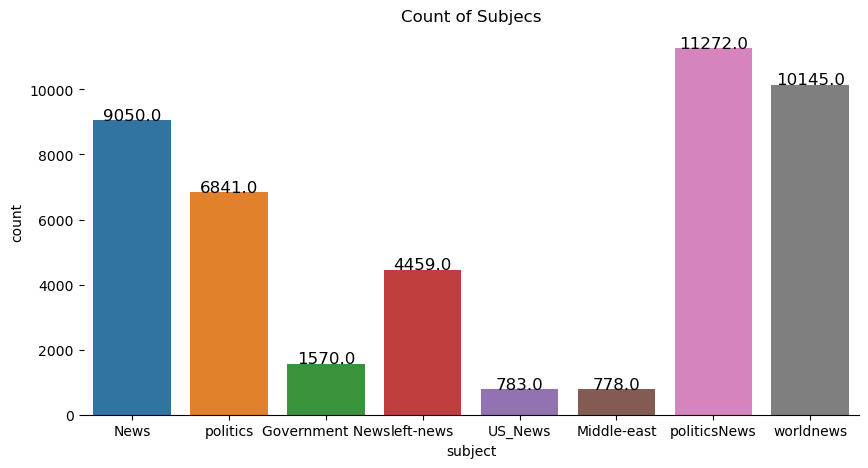

In [16]:
#Let's do the same for subject column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="subject", data=df)
plt.title("Count of Subjecs")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

# Data Cleaning

In [17]:
#Check for missing values in every column
df.isna().sum()*100/len(df)

title       0.0
text        0.0
subject     0.0
date        0.0
category    0.0
dtype: float64

In [18]:
#Check for empty string in text column
blanks=[]

#index,label and review of the doc
for index,text in df["text"].items(): # it will iter through index,label and review
    if text.isspace(): # if there is a space
        blanks.append(index) #it will be noted down in empty list

len(blanks)

631

In [19]:
#instead of dropping these values we are going to merge title with text

df["text"] =df["title"]+df["text"]

#we only need two columns rest can be ignored

df=df[["text","category"]]

In [20]:
#importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import spacy
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')

### Stopwords 
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory. home/pratima/nltk_data/corpora/stopwords is the directory address.(Do not forget to change your home directory name)

### Lemmatisation
lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a morphological analysis to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

In [21]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [22]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [23]:
#text cleaning function
def clean_text(text):
    
    """
    It takes text as an input and clean it by applying several methods
    
    """
    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [24]:
#cleaning the whole data
df["text"]=df["text"].apply(clean_text)

# Word Cloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [25]:
from wordcloud import WordCloud

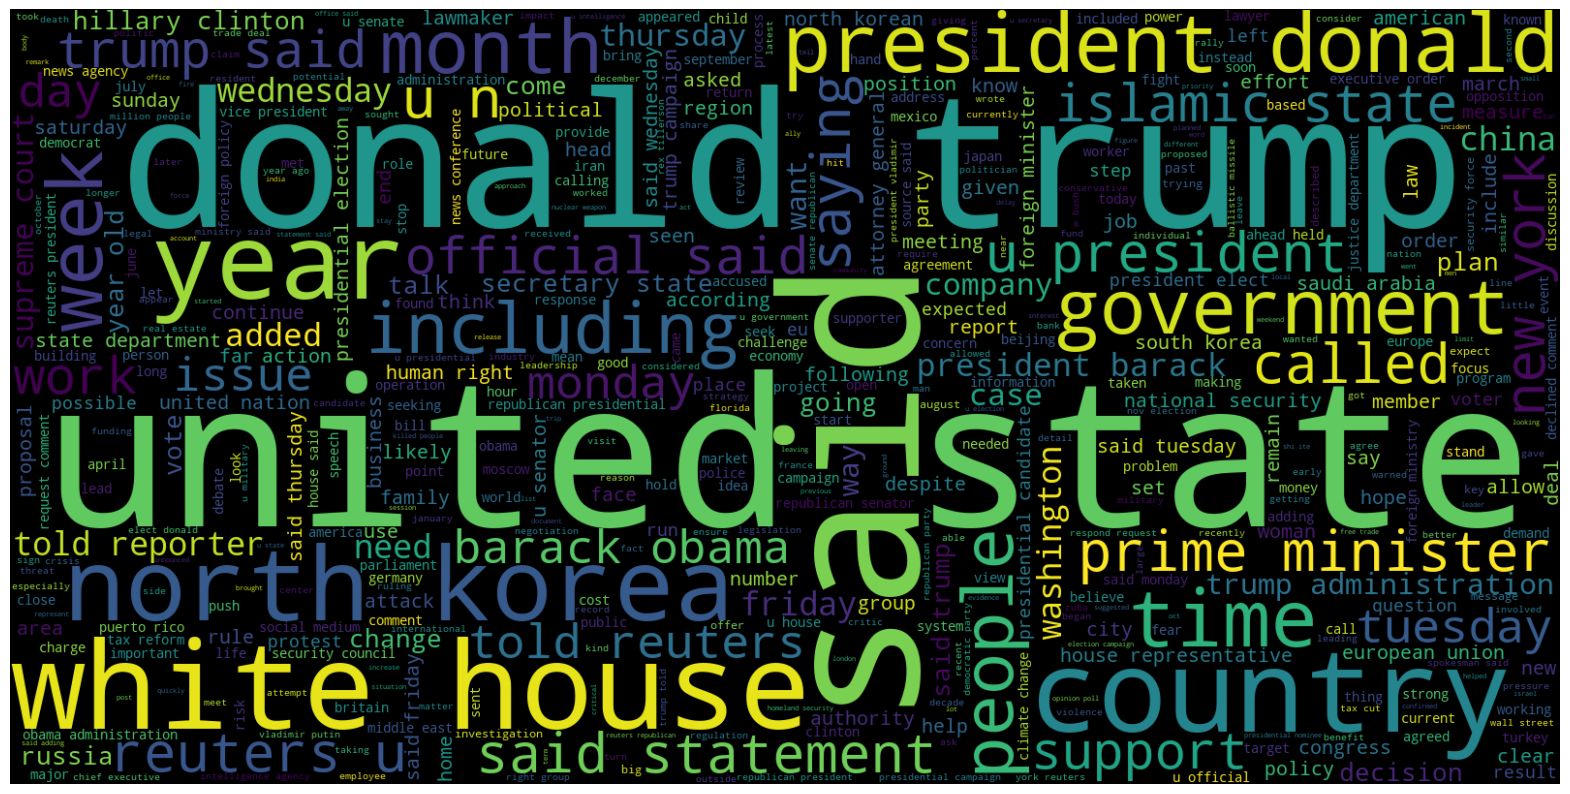

In [26]:
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [27]:
#creating more intiuive wordcloud 

#pil is pillow and used for image manupulation
from PIL import Image

In [28]:
#creating a mask of thumb
thumb="K.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

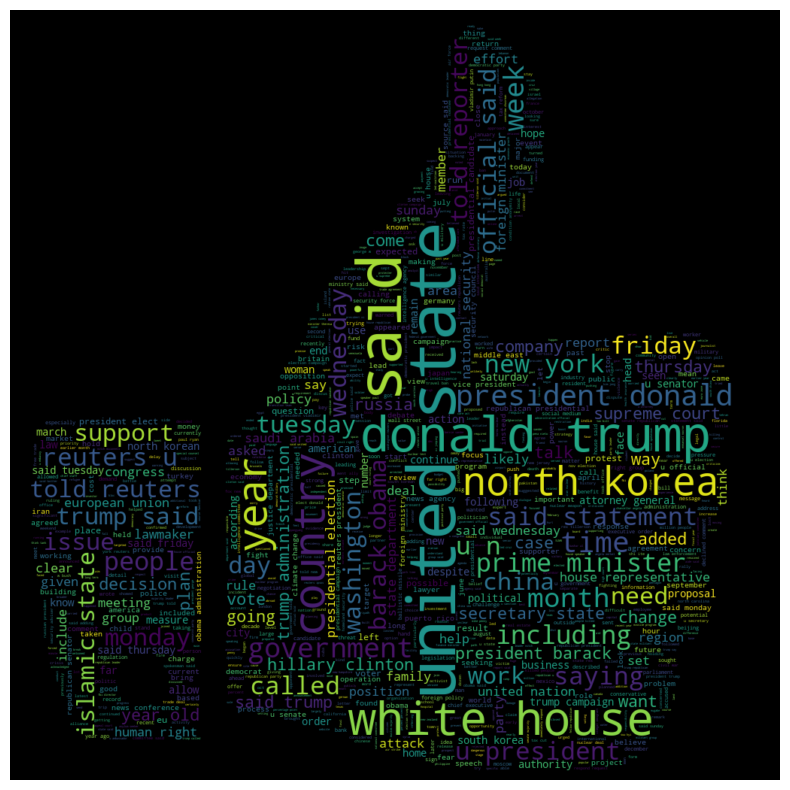

In [29]:
#True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

#  Feature-Extraction & Model building 


In [30]:
#splitting the data 
from sklearn.model_selection import train_test_split


X=df["text"] #feature 
y=df["category"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [32]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [33]:
#making prediction using the model
predictions=text_clf.predict(X_test)

In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7039
           1       0.99      0.99      0.99      7778

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [35]:
#overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.9935884457042586


In [36]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[6997   42]
 [  53 7725]]


In [37]:
#let's pickle the model
import pickle
with open('text_clf_model.pkl', 'wb') as file:
    pickle.dump(text_clf, file)

In [ ]:
"Real News Example"
'''
WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trumpâ€™s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administrationâ€™s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. â€œThe Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DODâ€™s study and will continue to defend the presidentâ€™s lawful authority in District Court in the meantime,â€ the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: â€œAs mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.â€ Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal â€œgreat news.â€ â€œIâ€™m hoping it means the government has come to see that there is no way to justify a ban and that itâ€™s not good for the military or our country,â€ Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obamaâ€™s policy of accepting them. Trump said on Twitter at the time that the military â€œcannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.â€ Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trumpâ€™s ban while legal challenges to the Republican presidentâ€™s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicantsâ€™ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept â€œsome individuals who are not medically fit for service.â€ The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trumpâ€™s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the presidentâ€™s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity. 

'''